In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
cust_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [31]:
X = cust_df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]    

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
inertia = []
k = range(1,11)
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

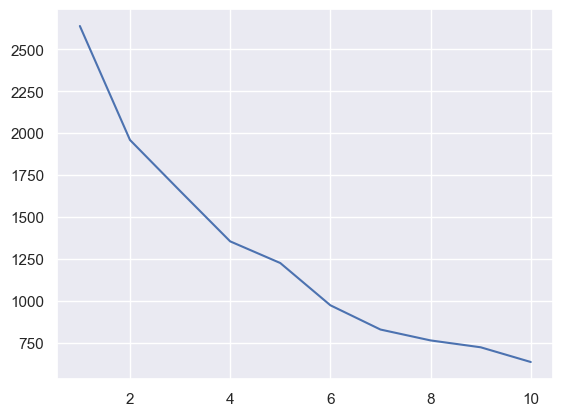

In [34]:
plt.plot(k, inertia)

In [35]:
cluster = 5
km = KMeans(n_clusters=cluster)
cust_df['cluster']=km.fit_predict(X_scaled)

In [36]:
cust_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,0


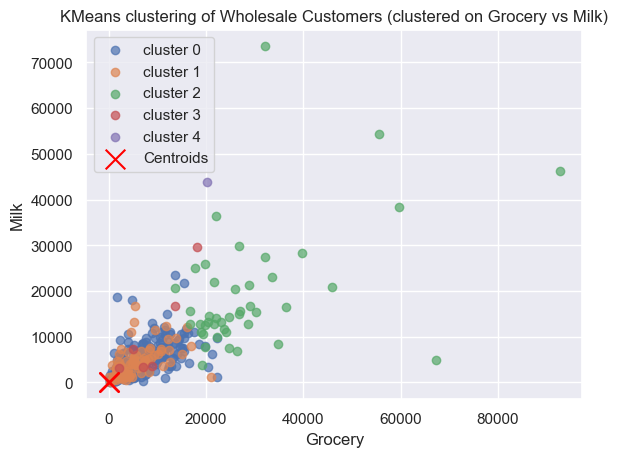

In [37]:
feature1 = 'Grocery'
feature2 = 'Milk'
for cluster_label in cust_df['cluster'].unique():
    plt.scatter(cust_df[cust_df['cluster'] == cluster_label][feature1], 
                cust_df[cust_df['cluster'] == cluster_label][feature2], 
                label=f'cluster {cluster_label}', alpha=0.7)

plt.scatter(km.cluster_centers_[:, X.columns.get_loc(feature1)], 
            km.cluster_centers_[:, X.columns.get_loc(feature2)], 
            marker='x', s=200, c='red', label='Centroids')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'KMeans clustering of Wholesale Customers (clustered on {feature1} vs {feature2})')
plt.legend()
plt.grid(True)
plt.show()